In [ ]:
1,2,3,4,5

[], [1], [2,3,4,5]
[1],[2],[3,4,5]

In [2]:
import sys
import argparse
import random
import numpy as np 
import time
import math
import matplotlib.pyplot as plt

sys.setrecursionlimit(3000)

# sort the array and pick the k-th smallest element from the sorted-array
def sort_and_select(current_array, k) :
    # sort the array
    sorted_current_array = np.sort(current_array)
    return sorted_current_array[k-1]

def randomized_select_with_multipe_pivots (current_array, k, no_of_pivots) :
    length = len(current_array)
    if (length <=no_of_pivots):
        return sort_and_select(current_array,k)
    mypivots = random.sample(current_array,no_of_pivots)
    data_lists =  [ [[]for i in range(no_of_pivots)] for j in range(3) ]
    for i in range(length):
        j = 0
        x = current_array[i]
        for pivot in mypivots:
            if (x<pivot):
                data_lists[0][j].append(x)
            elif (x==pivot):
                data_lists[1][j].append(x)
            else:
                data_lists[2][j].append(x)
            j=j+1
    less_lengths  = [len(ls) for ls in data_lists[0] ]    
    large_lengths = [len(lg) for lg in data_lists[2]] 
    equal_lengths = [len(e) for e in data_lists[1]  ] 
    Lengths = [less_lengths,equal_lengths,large_lengths]
    kindex = [0]*no_of_pivots 
    for i in range(no_of_pivots):
        if k <=less_lengths[i]:
            kindex[i] = 0
        elif k >less_lengths[i] and k <= less_lengths[i]+equal_lengths[i]:
            kindex[i] = 1
        else:
            kindex[i] = 2
    #print (Lengths )   
    min_length = Lengths[kindex[0]][0]
    index = 0
    for i in range(1,no_of_pivots):
        if min_length > Lengths[kindex[i]][i]:
            min_length = Lengths[kindex[i]][i]
            index = i
    small_range = data_lists[kindex[index]][index]
    k_ = k
    if kindex[index] ==1:
        return data_lists[1][index][0]
    elif kindex[index]==0:
        k_ = k
    else:
        k_ = k - Lengths[0][index] - Lengths[1][index]
    no_of_pivots_ = no_of_pivots
    
    L = Lengths[kindex[index]][index]
    
    return randomized_select_with_multipe_pivots (small_range, k_, no_of_pivots_) 


my_array = [random.randint(1,100*1000) for _ in range(1000)]
randomized_select_with_multipe_pivots (my_array, 400, 10) 


39038

1 1000
2 1000
3 1000
4 1000
5 1000
6 1000
7 1000
8 1000
9 1000
10 1000
11 1000
12 1000
13 1000
14 1000
15 1000
16 1000
17 1000
18 1000
19 1000
20 1000
21 1000
22 1000
23 1000
24 1000
25 1000
26 1000
27 1000
28 1000
29 1000
30 1000
31 1000
32 1000
33 1000
34 1000
35 1000
36 1000
37 1000
38 1000
39 1000
#Pivots =  1 ; Mean-Regressor's slope =  8.286401675162391e-07 ; Std-Dev-Regressor's slope =  2.404191444496022e-07
1 1000
2 1000
3 1000
4 1000
5 1000
6 1000
7 1000
8 1000
9 1000
10 1000
11 1000
12 1000
13 1000
14 1000
15 1000
16 1000
17 1000
18 1000
19 1000
20 1000
21 1000
22 1000
23 1000
24 1000
25 1000
26 1000
27 1000
28 1000
29 1000
30 1000
31 1000
32 1000
33 1000
34 1000
35 1000
36 1000
37 1000
38 1000
39 1000
#Pivots =  2 ; Mean-Regressor's slope =  9.114142495735095e-07 ; Std-Dev-Regressor's slope =  2.015848087898337e-07
1 1000
2 1000
3 1000
4 1000
5 1000
6 1000
7 1000
8 1000
9 1000
10 1000
11 1000
12 1000
13 1000
14 1000
15 1000
16 1000
17 1000
18 1000
19 1000
20 1000
21 1000
22 

<Figure size 576x1440 with 0 Axes>

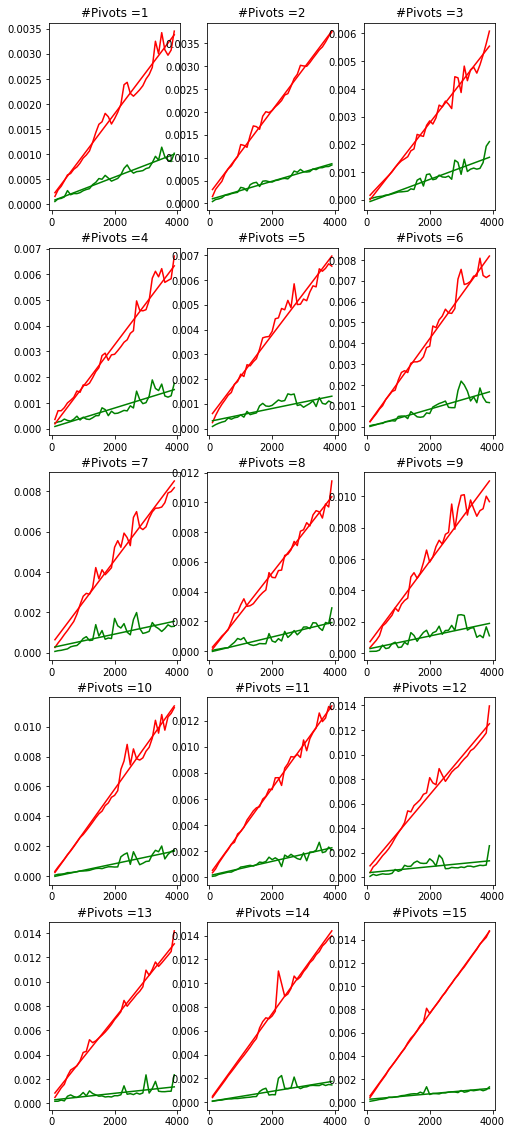

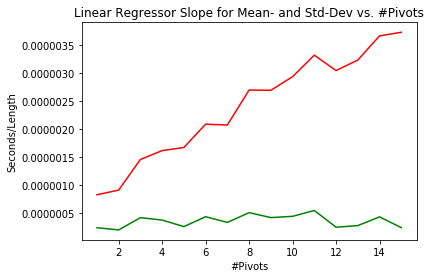

Sensitivity of the Slope of the Linear Regressor of the Mean to the #Pivots    =  2.0938982346916696e-07
Sensitivity of the Slope of the Linear Regressor of the Std-Dev to the #Pivots =  4.1378957755802265e-09


In [4]:
max_no_of_pivots = 15

# Number of Trials
number_of_trials = 1000

# We are going to see if there is any observable difference in the slope of the Linear Regressor
# for the Mean (resp. Standard-Deviation) of the Running Time 
# and the slope of standard-deviation-regressor as the number of pivots are increased
slope_of_mean_regressor_as_a_function_of_no_of_pivots = []
slope_of_std_dev_regressor_as_a_function_of_no_of_pivots = []

# I am going to plot a lot of things
# I found the stuff here -- https://matplotlib.org/gallery/subplots_axes_and_figures/figure_title.html
# to be useful. Instead, I just used what got from here to get the subplots not to get squished down -- 
# https://stackoverflow.com/questions/41530975/set-size-of-subplot-in-matplotlib
fig = plt.figure(figsize=(8, 20))

# try #pivots = 1,2,3,4 and see if having more pivots is helping with the run-time
for number_of_pivots in range(1, max_no_of_pivots+1) :
    
    # arrays containing mean- and std-dev of running time as a function of 
    # array size starting from 100 to 4000 in steps of 100
    mean_running_time = []
    std_dev_running_time = []
        
    # cycle through a bunch of array sizes, where "k" is randomly chosen
    for j in range(1, 40) :
        array_size = 100*j
        # let is pick k to be (close to) the median 
        k = math.ceil(array_size/2)
        # fill the array with random values
        my_array = [random.randint(1,100*array_size) for _ in range(array_size)]
        print (j,number_of_trials)
        # run a bunch of random trials and get the algorithm's running time
        running_time = []
        for i in range(1, number_of_trials) :
            t1 = time.time()
            answer1 = randomized_select_with_multipe_pivots(my_array,k,number_of_pivots)
            t2 = time.time()
            running_time.extend([t2-t1])
            # uncomment the lines below to verify the solution of randomized_select_with_pivots
            answer2 = sort_and_select(my_array, k)
            if (answer1 != answer2):
                print ("SOMETHING WENT FUCKING WRONG")
        mean_running_time.extend([np.mean(running_time)])
        std_dev_running_time.extend([np.std(running_time)])

    # linear fit (cf. https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.polyfit.html)
    t = np.arange(100, 4000, 100)
    z1 = np.polyfit(t, mean_running_time, 1)
    p1 = np.poly1d(z1)
    z2 = np.polyfit(t, std_dev_running_time, 1)
    p2 = np.poly1d(z2)
    
    print("#Pivots = ", number_of_pivots, "; Mean-Regressor's slope = ", z1[0], "; Std-Dev-Regressor's slope = ", z2[0])
    slope_of_mean_regressor_as_a_function_of_no_of_pivots.extend([z1[0]])
    slope_of_std_dev_regressor_as_a_function_of_no_of_pivots.extend([z2[0]])
    
    # plot the mean and standard deviation of the running-time as a function of array-size    
    axs = fig.add_subplot(5, 3, number_of_pivots)
    plt.plot(t, mean_running_time, 'r', t, std_dev_running_time, 'g', t, p1(t), 'r-', t, p2(t), 'g-')
    axs.set_title('#Pivots =' + str(number_of_pivots))

plt.savefig("fig2.pdf", bbox_inches='tight')
plt.show()
                                 
# plot the slope of the two regressors as a function of #pivots
x = [i for i in range(1, max_no_of_pivots+1)]
plt.plot(x, slope_of_mean_regressor_as_a_function_of_no_of_pivots, 'r', x, slope_of_std_dev_regressor_as_a_function_of_no_of_pivots, 'g')
plt.title('Linear Regressor Slope for Mean- and Std-Dev vs. #Pivots')
plt.xlabel('#Pivots')
plt.ylabel('Seconds/Length')
plt.savefig("fig1.pdf", bbox_inches='tight')
plt.show()

# Checking if increasing the number of pivots is helping with the runtime in any significant manner... 
z3 = np.polyfit(x, slope_of_mean_regressor_as_a_function_of_no_of_pivots, 1)
z4 = np.polyfit(x, slope_of_std_dev_regressor_as_a_function_of_no_of_pivots, 1)
print("Sensitivity of the Slope of the Linear Regressor of the Mean to the #Pivots    = ", z3[0])
print("Sensitivity of the Slope of the Linear Regressor of the Std-Dev to the #Pivots = ", z4[0])
